In [0]:
#################################################################################################################
# Sentiment Analysis - Twitter Feed Democrats and Republicans and objective review of sentiment without bias    # 
# Project Data Analysis Task: Review the Twitter Feed of the President of the United States and the             # 
# the democratic candidate and present the results in a project Report both written and presented                   #
# (Information Visualization)                                                                                   # 
#################################################################################################################

In [0]:
####################################################################################################################
# Project Type: Twitter Data Sentiment Analysis and Tweet Text Tokention, Lemmitization, Stemmimng and NLP         #
# Project Charter: process one collection of Twiiter data and summarize information from a number of fields.       #
# This is similar to the example programs for Twitter hashtags or Facebook counts but must access different and    # 
# more fields than in those examples.                                                                              #
# Project Specified Tasks: process one collection of data and separate it into different categories and give some  # 
# summary statistics on those categories. For example, bin the tweets by day or by hour and report on the number   # 
# of tweets per day or hour. Process two or more collections of data and compare some summary data about the two   #
# collections.                                                                                                     #
# For example, collect Twitter user timelines from different political candidates and compare the number of        #
# retweets of their tweets.                                                                                        # 
# Project Deliverable: Sentiment Analysis of Twitter tweets on The President of the United States (POTUS) and the  #
# Joe Biden -  most likely democratic candidate                                                                                           #
# Project Type: Group Project                                                                                      #
# Project Team:                                                                                                    #                                                                                                    #
# Michael Esparza, PMP, PgMP, CPEM                                                                                 #
# Lily Han                                                                                                         #           
# Jo Vivian, PMP                                                                                                       # 
# Data Source is Twitter via Application Programming Interface (API)                                               #
####################################################################################################################

In [3]:
pip install tweepy

In [4]:
pip install joypy

In [0]:
# With the project plan in place and specifed and implied tasks outlined, import the required modules for the analysis.
# tweepy now imports because of pip install
# re module imported for manipulation of regular text expresssions
# nltk module imported for parsing and language operations and manipulation
import tweepy 
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
import joypy
import re    
import nltk  
import string
import warnings

In [0]:
# Based on the amount of data to be explored and reviewed, visual presentation will support the analysis
# Import the required models for information visualization and presentation 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy import stats

In [7]:
pip install credentials

In [8]:
# Determine the current working directory and review to ensure that the data environment is set
import os
cwd = os.getcwd()
print(cwd)

/content


In [0]:
# Review all files in the directory to ensure process is on proper path
import os
files = os.listdir()  
files

['.config', 'sample_data']

In [0]:
# Begin extraction of the raw twitter data. Keys will be required and used to access the raw data
# User Keys presented 
CONSUMER_KEY    = 'Z7swXxO5KISDASwxiJmoHXQnX'
CONSUMER_SECRET = 'VDBJKxoY3MCb7s5YbIl5lTk4HSgayQYIbVxRQ81iGtgD6MdyZq'
# Access Keys presented
ACCESS_TOKEN  = '418036639-PTleI12U9lBDsPDCdiJFjSYqhBkyskGjEScalAzA'
ACCESS_SECRET = 'DAkPHeIJbZ2vyNzGxY9JnoVPhcXoOjOw0o0pO7mItM6vP'
from credentials import *

In [0]:
# Define the Application Programming Interace (API) architecture for data analysis
# Execute authentication ping for API connection verification
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [0]:
# Define a data extraction function for twitter
xtr = twitter_setup()

In [15]:
# Construct a "tweet" list based on the Mr. Trump's user handle
# Counts attempted: 2000, 1000, 4000 and 5000. 500 yielded 200 tweets
tweets = xtr.user_timeline(screen_name="RealDonaldTrump", count=5000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# From the tweet list, extract the most recent 10 tweets
print("The Ten Most Recent tweets from POTUS Twitter Handle:\n")
for tweet in tweets[:11]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

The Ten Most Recent tweets from POTUS Twitter Handle:

RT @MichaelCoudrey: NEW DATA: A French study has demonstrated evidence that the combination of Hydroxychloroquine &amp; Azithromycin are highly…

RT @MichaelCoudrey: Everyone who thinks coronavirus is harmless or doesn’t matter should rethink that opinion immediately.

This is an extr…

....be put in use IMMEDIATELY. PEOPLE ARE DYING, MOVE FAST, and GOD BLESS EVERYONE! @US_FDA @SteveFDA @CDCgov @DHSgov

HYDROXYCHLOROQUINE &amp; AZITHROMYCIN, taken together, have a real chance to be one of the biggest game changers in the… https://t.co/0ZEF0mdfJg

Great story. Thank you to Mr. Young of Jonesboro, Arkansas! https://t.co/i9xH8VXfS2

https://t.co/MLLfFTqv19

https://t.co/2wAUfZwBsa

RT @SecretarySonny: To the heroes in the U.S. food supply chain, we salute you. https://t.co/3wIUuNtUpb

RT @SecretService: "Stay safe, stay healthy, and take care of each other." - Director James Murray thanks all those wh

In [16]:
# With the tweet list constructed and most recent 10 tweets reviwed, convert the data to a pandas array
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data.head(11)

,Tweets
0,RT @MichaelCoudrey: NEW DATA: A French study has demonstrated evidence that the combination of Hydroxychloroquine &amp; Azithromycin are highly…
1,RT @MichaelCoudrey: Everyone who thinks coronavirus is harmless or doesn’t matter should rethink that opinion immediately.\n\nThis is an extr…
2,"....be put in use IMMEDIATELY. PEOPLE ARE DYING, MOVE FAST, and GOD BLESS EVERYONE! @US_FDA @SteveFDA @CDCgov @DHSgov"
3,"HYDROXYCHLOROQUINE &amp; AZITHROMYCIN, taken together, have a real chance to be one of the biggest game changers in the… https://t.co/0ZEF0mdfJg"
4,"Great story. Thank you to Mr. Young of Jonesboro, Arkansas! https://t.co/i9xH8VXfS2"
5,https://t.co/MLLfFTqv19
6,https://t.co/2wAUfZwBsa
7,"RT @SecretarySonny: To the heroes in the U.S. food supply chain, we salute you. https://t.co/3wIUuNtUpb"
8,"RT @SecretService: ""Stay safe, stay healthy, and take care of each other."" - Director James Murray thanks all those who are continuing to w…"
9,"Today I spoke with our Nation’s Small Businesses, which employ nearly half of America’s workforce. We are taking th… https://t.co/g63rVWineB"


In [17]:
# Identify the quantifiable data attributes to determine sentiment. Structure the required data in the array
# Review the data frame with the added data attributes
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['Tweets'] = np.array([tweet.text for tweet in tweets])
display(data.head(11))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @MichaelCoudrey: NEW DATA: A French study has demonstrated evidence that the combination of Hydroxychloroquine &amp; Azithromycin are highly…,144,1241398266941657093,2020-03-21 16:16:25,Twitter for iPhone,0,11973
1,RT @MichaelCoudrey: Everyone who thinks coronavirus is harmless or doesn’t matter should rethink that opinion immediately.\n\nThis is an extr…,140,1241395145070780416,2020-03-21 16:04:01,Twitter for iPhone,0,4733
2,"....be put in use IMMEDIATELY. PEOPLE ARE DYING, MOVE FAST, and GOD BLESS EVERYONE! @US_FDA @SteveFDA @CDCgov @DHSgov",117,1241367245143642113,2020-03-21 14:13:09,Twitter for iPhone,83128,19583
3,"HYDROXYCHLOROQUINE &amp; AZITHROMYCIN, taken together, have a real chance to be one of the biggest game changers in the… https://t.co/0ZEF0mdfJg",144,1241367239900778501,2020-03-21 14:13:08,Twitter for iPhone,217235,63319
4,"Great story. Thank you to Mr. Young of Jonesboro, Arkansas! https://t.co/i9xH8VXfS2",83,1241354162144784384,2020-03-21 13:21:10,Twitter for iPhone,37392,9273
5,https://t.co/MLLfFTqv19,23,1241182475759599616,2020-03-21 01:58:56,Twitter for iPhone,53416,13351
6,https://t.co/2wAUfZwBsa,23,1241182310994792449,2020-03-21 01:58:17,Twitter for iPhone,50843,11284
7,"RT @SecretarySonny: To the heroes in the U.S. food supply chain, we salute you. https://t.co/3wIUuNtUpb",103,1241137826122608640,2020-03-20 23:01:31,Twitter for iPhone,0,13846
8,"RT @SecretService: ""Stay safe, stay healthy, and take care of each other."" - Director James Murray thanks all those who are continuing to w…",140,1241133930201460736,2020-03-20 22:46:02,Twitter for iPhone,0,7924
9,"Today I spoke with our Nation’s Small Businesses, which employ nearly half of America’s workforce. We are taking th… https://t.co/g63rVWineB",140,1241097732456099842,2020-03-20 20:22:12,Twitter for iPhone,92401,21308


In [0]:
#Export Dataframe to JSON
Export = data.to_json(r'Export_Tweets.json')

In [0]:
from google.colab import files
files.download("Export_Tweets.json")

In [0]:
_json_file = 'Export_Tweets.json'
pd_json = pd.read_json(_json_file, convert_dates=True)
pd_json.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404


In [0]:
# Exploratory Data Analysis (EDA) first pass on tweet review, display raw data from the first tweet on the list
display(tweets[0].id)
display(tweets[0].created_at)
display(tweets[0].source)
display(tweets[0].favorite_count)
display(tweets[0].retweet_count)
display(tweets[0].geo)
display(tweets[0].coordinates)
display(tweets[0].entities)

1238600318608384001

datetime.datetime(2020, 3, 13, 22, 58, 22)

'Twitter for iPhone'

0

1266

None

None

{'hashtags': [],
 'symbols': [],
 'urls': [],
 'user_mentions': [{'id': 822215673812119553,
   'id_str': '822215673812119553',
   'indices': [3, 14],
   'name': 'The White House',
   'screen_name': 'WhiteHouse'}]}

In [0]:
# Determine the mean length of the tweets. tweets are limited to a specific character count, and longer tweet contains 
# additional raw data for sentiment analysis than a short tweet
## Stop Length for a tweet is 140 characters
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
##Average Tweet Length
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 119.43


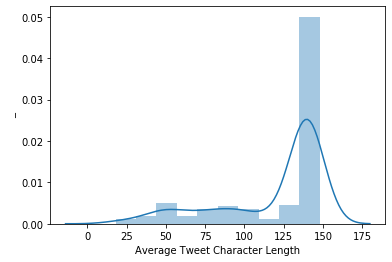

In [0]:
# Visually Represent the mean length of the tweets to the view the statistical spread
sns.distplot(data['len']);
plt.xlabel("Average Tweet Character Length")
plt.ylabel("_")
# Remove the plot text for a clean visual
plt.show()

In [0]:
# After caculating the average length of a tweet, determine the word count
data['word_count'] = data['Tweets'].apply(lambda x: len(str(x).split(" ")))
data[['Tweets','word_count']].head(11)

,Tweets,word_count
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",24
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",20
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",23
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",24
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",18
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,21
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",21
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,10
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",16
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",23


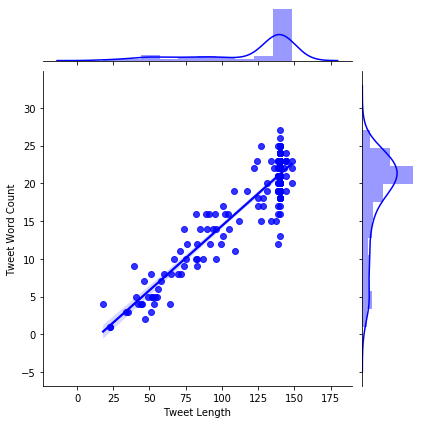

In [0]:
# Visually Represent the word count of the tweets vs the twwet length to the view the statistical relation
sns.jointplot(data = data, x = 'len', y = 'word_count', kind = 'reg', color = 'b')
plt.xlabel("Tweet Length")
plt.ylabel("Tweet Word Count")
# Remove the plot text for a clean visual
plt.show()
# As tweet length increases, so does the word count - word count and tweet length have a positive relation

In [0]:
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292,21
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836,21
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021,10
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263,16
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404,23


In [0]:
# Number of Characters - this metric also includes white space
data['char_count'] = data['Tweets'].str.len() 
mean2 = np.mean(data['char_count'])
print("The average character length: {}".format(mean2))

The average character length: 119.43


In [0]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Tweets'].apply(lambda x: avg_word(x))
a = data[['Tweets', 'len', 'ID','Date','Source','char_count','word_count','avg_word', 'Likes', 'RTs']].head(11)
a

,Tweets,len,ID,Date,Source,char_count,word_count,avg_word,Likes,RTs
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,140,24,4.875000,0,1266
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,140,20,6.050000,0,1610
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,124,23,4.434783,10949,3027
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,140,24,4.875000,19536,5870
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,140,18,6.833333,35691,8424
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,139,21,5.666667,45112,11292
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,140,21,5.714286,48082,12836
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,96,10,8.700000,0,10021
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,91,16,4.750000,126169,27263
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,140,23,5.130435,123972,25404


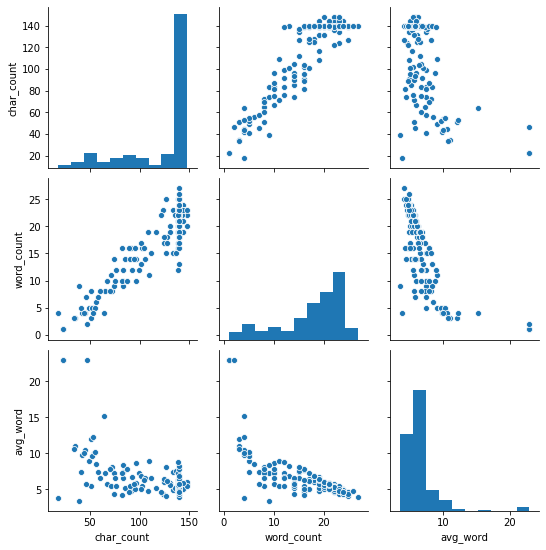

In [0]:
x = sns.pairplot(data[['char_count','word_count','avg_word']], diag_kind="hist")
 
for ax in x.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=0)

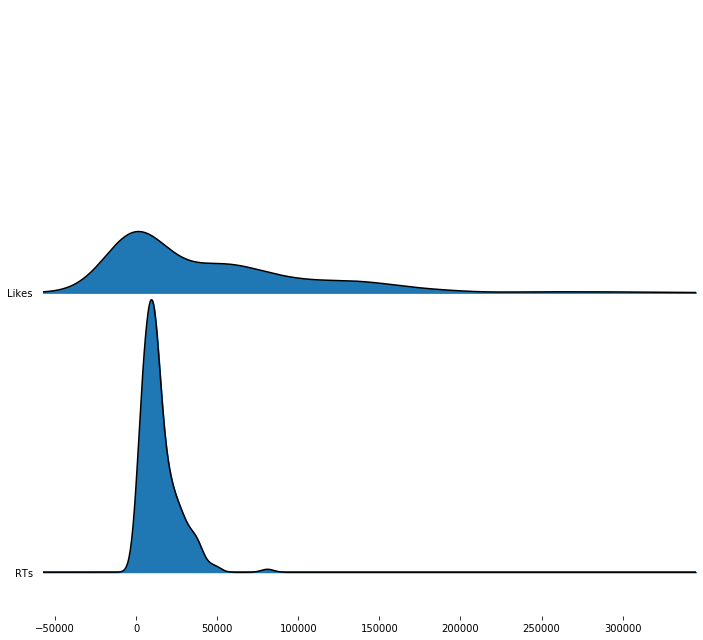

In [0]:
b = data[['Likes', 'RTs']]
fig, axes = joypy.joyplot(b, figsize=(10,9))

In [0]:
a = data 
display(a)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24,140,4.875000
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20,140,6.050000
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23,124,4.434783
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24,140,4.875000
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18,140,6.833333
...,...,...,...,...,...,...,...,...,...,...
195,"RT @DailyCaller: A lifelong Dem voter talks about why he flipped to Trump in 2016:\n\n""I’m focused on the economy and on regulation and dereg…",140,1235794775137226752,2020-03-06 05:10:09,Twitter for iPhone,0,6567,24,140,4.600000
196,"RT @DailyCaller: President @realDonaldTrump says he was ready to face ""communist"" Bernie Sanders and then Joe Biden won on ""Super Tuesday,…",139,1235794705843212288,2020-03-06 05:09:52,Twitter for iPhone,0,7093,21,139,5.666667
197,RT @thejtlewis: President @realDonaldTrump did excellent on the FOX #TrumpTownHall tonight. Getting the feeling that 2020 will see one of t…,140,1235794309426880512,2020-03-06 05:08:17,Twitter for iPhone,0,5286,21,140,5.714286
198,RT @CBPMarkMorgan: We remain absolutely relentless in our counter-narcotics mission. The men &amp; women of @CBP remain committed to keeping dr…,144,1235782042232721409,2020-03-06 04:19:33,Twitter for iPhone,0,4591,21,144,5.904762


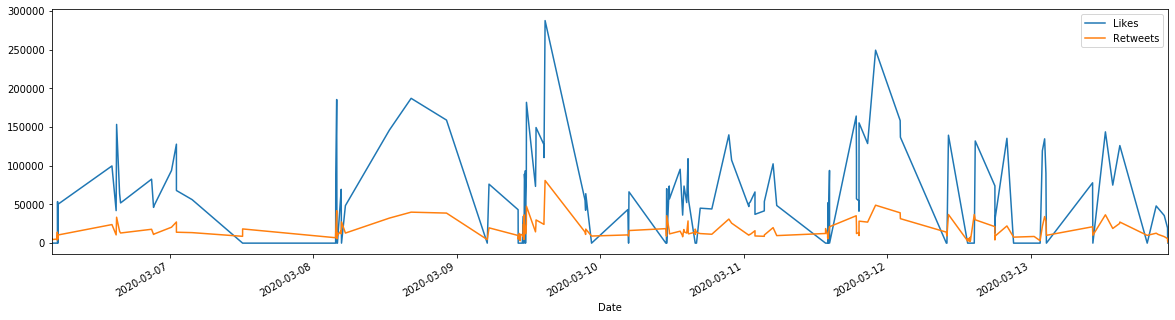

In [0]:
# Execute Temporal Analysis over data collection period - present tweet likes and retweets, present visually 
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
# Likes vs retweets visualization:
tfav.plot(figsize=(20,5), label="Likes", legend=True)
tret.plot(figsize=(20,5), label="Retweets", legend=True);

In [0]:
# Execute a data call for a available data sources, and print the data source for verfication and reporting
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Media Studio


In [0]:
# Identify the tweet from the POTUS handle with the most likes and retweets, print the results

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

print('The tweet with the most likes from the POTUS twitter handle is: \n{}'.format(data['Tweets'][fav])) 
print('The Total Number of Likes for this Tweet: {}'.format(fav_max))
print('The Tweet has a length of: {} characters.\n'.format(data['len'][fav]))

print('The tweet with the most retweets is: \n{}'.format(data['Tweets'][rt]))
print('This tweet has been retweeted: {}'.format(rt_max), 'times')
print('The Character Length of this retweet is: {} characters.\n'. format(data['len'][rt]))

The tweet with the most likes from the POTUS twitter handle is: 
So last year 37,000 Americans died from the common Flu. It averages between 27,000 and 70,000 per year. Nothing is… https://t.co/yFtpDzcod4
The Total Number of Likes for this Tweet: 287782
The Tweet has a length of: 139 characters.

The tweet with the most retweets is: 
So last year 37,000 Americans died from the common Flu. It averages between 27,000 and 70,000 per year. Nothing is… https://t.co/yFtpDzcod4
This tweet has been retweeted: 81019 times
The Character Length of this retweet is: 139 characters.



In [0]:
# With the initial stage of the data task complete (data collection and cleaning), the data analysis task proceeds
# to sentiment analysis
# The NLTK module is imported to support the sentiment analysis, identifying the stopwords
# stopwords will complicate the sentiment analysis
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24,140,4.875000
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20,140,6.050000
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23,124,4.434783
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24,140,4.875000
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18,140,6.833333
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292,21,139,5.666667
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836,21,140,5.714286
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021,10,96,8.700000
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263,16,91,4.750000
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404,23,140,5.130435


In [0]:
# From NLTK, import english stopwords and identify them and fit to the data
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Tweets','Date','Likes','RTs','char_count','word_count','avg_word','stopwords']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",2020-03-13 22:58:22,0,1266,140,24,4.875000,9
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",2020-03-13 22:58:11,0,1610,140,20,6.050000,5
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",2020-03-13 22:54:37,10949,3027,124,23,4.434783,9
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",2020-03-13 22:54:36,19536,5870,140,24,4.875000,8
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",2020-03-13 22:21:18,35691,8424,140,18,6.833333,5
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,2020-03-13 21:19:39,45112,11292,139,21,5.666667,7
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",2020-03-13 21:00:16,48082,12836,140,21,5.714286,7
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,2020-03-13 19:30:16,0,10021,96,10,8.700000,1
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",2020-03-13 14:55:34,126169,27263,91,16,4.750000,5
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",2020-03-13 14:52:59,123972,25404,140,23,5.130435,12


In [0]:
# Identify the tweets and retweets that have been hash tagged 
data['hashtags'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",2020-03-13 22:58:22,0,1266,140,24,4.875000,9,0
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",2020-03-13 22:58:11,0,1610,140,20,6.050000,5,0
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",2020-03-13 22:54:37,10949,3027,124,23,4.434783,9,0
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",2020-03-13 22:54:36,19536,5870,140,24,4.875000,8,0
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",2020-03-13 22:21:18,35691,8424,140,18,6.833333,5,0
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,2020-03-13 21:19:39,45112,11292,139,21,5.666667,7,0
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",2020-03-13 21:00:16,48082,12836,140,21,5.714286,7,0
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,2020-03-13 19:30:16,0,10021,96,10,8.700000,1,0
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",2020-03-13 14:55:34,126169,27263,91,16,4.750000,5,0
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",2020-03-13 14:52:59,123972,25404,140,23,5.130435,12,0


In [0]:
# Identify the tweets and retweets that contain numeric data
data['numerics'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags','numerics']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags,numerics
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",2020-03-13 22:58:22,0,1266,140,24,4.875000,9,0,0
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",2020-03-13 22:58:11,0,1610,140,20,6.050000,5,0,0
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",2020-03-13 22:54:37,10949,3027,124,23,4.434783,9,0,0
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",2020-03-13 22:54:36,19536,5870,140,24,4.875000,8,0,0
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",2020-03-13 22:21:18,35691,8424,140,18,6.833333,5,0,0
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,2020-03-13 21:19:39,45112,11292,139,21,5.666667,7,0,0
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",2020-03-13 21:00:16,48082,12836,140,21,5.714286,7,0,0
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,2020-03-13 19:30:16,0,10021,96,10,8.700000,1,0,0
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",2020-03-13 14:55:34,126169,27263,91,16,4.750000,5,0,0
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",2020-03-13 14:52:59,123972,25404,140,23,5.130435,12,0,1


In [0]:
# Identify Tweets and Retweets that contain uppercase words
data['upper'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'word_count','avg_word','stopwords','hashtags','numerics','upper']].head(11)

,Tweets,Date,Likes,RTs,char_count,word_count,word_count,avg_word,stopwords,hashtags,numerics,upper
0,"RT @WhiteHouse: ""The spirit and the will of our nation is unbreakable. We will defeat this threat. When America is tested, America rises to…",2020-03-13 22:58:22,0,1266,140,24,24,4.875000,9,0,0,1
1,"RT @WhiteHouse: Today's emergency orders will allow the @HHSgov Secretary to waive applicable rules and regulations to give doctors, hospit…",2020-03-13 22:58:11,0,1610,140,20,20,6.050000,5,0,0,1
2,"....No matter where you may be, I encourage you to turn towards prayer in an act of faith. Together, we will easily PREVAIL!",2020-03-13 22:54:37,10949,3027,124,23,23,4.434783,9,0,0,2
3,"It is my great honor to declare Sunday, March 15th as a National Day of Prayer. We are a Country that, throughout o… https://t.co/Fk5kVI6uPw",2020-03-13 22:54:36,19536,5870,140,24,24,4.875000,8,0,0,0
4,"At my request, effective midnight tonight, Carnival, Royal Caribbean, Norwegian, and MSC have all agreed to suspend… https://t.co/ZqGbQ0RVAp",2020-03-13 22:21:18,35691,8424,140,18,18,6.833333,5,0,0,1
5,We will remove or eliminate every obstacle necessary to deliver our people the care they need. No resource will be… https://t.co/yNdJRw3udL,2020-03-13 21:19:39,45112,11292,139,21,21,5.666667,7,0,0,0
6,"To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emer… https://t.co/dOnYAypcm3",2020-03-13 21:00:16,48082,12836,140,21,21,5.714286,7,0,0,1
7,RT @WhiteHouse: LIVE: President @realDonaldTrump holds a news conference https://t.co/D975UkADhj,2020-03-13 19:30:16,0,10021,96,10,10,8.700000,1,0,0,2
8,"I will be having a news conference today at 3:00 P.M., The White House. Topic: CoronaVirus!",2020-03-13 14:55:34,126169,27263,91,16,16,4.750000,5,0,0,2
9,"To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. I… https://t.co/P3NVR62BkM",2020-03-13 14:52:59,123972,25404,140,23,23,5.130435,12,0,1,1


In [0]:
# With the inital EDA complete, convert the tweet text to lower case for context frre grammar (CFG) sentiment analysis task
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Tweets'].head(11)

0     rt @whitehouse: "the spirit and the will of our nation is unbreakable. we will defeat this threat. when america is tested, america rises to…
1     rt @whitehouse: today's emergency orders will allow the @hhsgov secretary to waive applicable rules and regulations to give doctors, hospit…
2                     ....no matter where you may be, i encourage you to turn towards prayer in an act of faith. together, we will easily prevail!
3     it is my great honor to declare sunday, march 15th as a national day of prayer. we are a country that, throughout o… https://t.co/fk5kvi6upw
4     at my request, effective midnight tonight, carnival, royal caribbean, norwegian, and msc have all agreed to suspend… https://t.co/zqgbq0rvap
5      we will remove or eliminate every obstacle necessary to deliver our people the care they need. no resource will be… https://t.co/yndjrw3udl
6     to unleash the full power of the federal government in this effort, today i am officially declaring a national e

In [0]:
# Strip the text of punctuation in order to have clean text data for the analysis
data['Tweets'] = data['Tweets'].str.replace('[^\w\s]','')
data['Tweets'].head(11)

0      rt whitehouse the spirit and the will of our nation is unbreakable we will defeat this threat when america is tested america rises to
1     rt whitehouse todays emergency orders will allow the hhsgov secretary to waive applicable rules and regulations to give doctors hospit
2                       no matter where you may be i encourage you to turn towards prayer in an act of faith together we will easily prevail
3        it is my great honor to declare sunday march 15th as a national day of prayer we are a country that throughout o httpstcofk5kvi6upw
4          at my request effective midnight tonight carnival royal caribbean norwegian and msc have all agreed to suspend httpstcozqgbq0rvap
5       we will remove or eliminate every obstacle necessary to deliver our people the care they need no resource will be httpstcoyndjrw3udl
6      to unleash the full power of the federal government in this effort today i am officially declaring a national emer httpstcodonyaypcm3
7            

In [0]:
# Remove the english commonly used stopword for a clear grammar
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweets']= data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweets'].head(11)

0                                      rt whitehouse spirit nation unbreakable defeat threat america tested america rises
1     rt whitehouse todays emergency orders allow hhsgov secretary waive applicable rules regulations give doctors hospit
2                                              matter may encourage turn towards prayer act faith together easily prevail
3                         great honor declare sunday march 15th national day prayer country throughout httpstcofk5kvi6upw
4             request effective midnight tonight carnival royal caribbean norwegian msc agreed suspend httpstcozqgbq0rvap
5                          remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl
6                unleash full power federal government effort today officially declaring national emer httpstcodonyaypcm3
7                                   rt whitehouse live president realdonaldtrump holds news conference httpstcod975ukadhj
8                       

In [0]:
#Remove common words and review the resulting grammar
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

rt                 100
coronavirus         31
realdonaldtrump     28
thank               23
president           20
great               19
trump               14
amp                 14
people              13
covid19             11
today               10
charliekirk11       10
whitehouse           9
news                 9
biden                8
best                 8
want                 8
like                 8
fake                 8
kag2020              8
democrat             8
russia               8
need                 8
state                8
us                   7
years                7
democrats            7
joe                  7
seemacms             7
federal              7
dtype: int64

In [0]:
# For Retweets, remove the short words and review the results
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,whitehouse spirit nation unbreakable defeat threat america tested america rises,140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24,140,4.875000,9,0,0,1
1,whitehouse todays emergency orders allow hhsgov secretary waive applicable rules regulations give doctors hospit,140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20,140,6.050000,5,0,0,1
2,matter encourage turn towards prayer faith together easily prevail,124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23,124,4.434783,9,0,0,2
3,great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw,140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24,140,4.875000,8,0,0,0
4,request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap,140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18,140,6.833333,5,0,0,1
5,remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292,21,139,5.666667,7,0,0,0
6,unleash full power federal government effort today officially declaring national emer httpstcodonyaypcm3,140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836,21,140,5.714286,7,0,0,1
7,whitehouse live president realdonaldtrump holds news conference httpstcod975ukadhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021,10,96,8.700000,1,0,0,2
8,news conference today white house topic coronavirus,91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263,16,91,4.750000,5,0,0,2
9,point strong border policy deaths related coronavirus httpstcop3nvr62bkm,140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404,23,140,5.130435,12,0,1,1


In [0]:
# With short words removed, conduct another run to remove common words and shorten the grammar to be subjected to analysis
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

coronavirus        31
realdonaldtrump    28
thank              23
president          20
great              19
trump              14
people             13
covid19            11
today              10
charliekirk11      10
whitehouse          9
news                9
russia              8
fake                8
kag2020             8
best                8
biden               8
like                8
state               8
need                8
want                8
democrat            8
federal             7
seemacms            7
democrats           7
years               7
country             6
help                6
bernie              6
well                6
dtype: int64

In [0]:
# Upon review of the resulting grammar after the processing, spelling normalization is required
# Correct the spelling of the grammar by importing textblob module

In [0]:
pip install textblob

In [0]:
#After the pip install, import the required module for the data analysis task
from textblob import TextBlob
data['Tweets'][:11].apply(lambda x: str(TextBlob(x).correct()))

0                                      whitehouse spirit nation unbreakable defeat threat america tested america rises
1     whitehouse today emergency orders allow hhsgov secretary wave applicable rules regulations give doctors hospital
2                                                   matter encourage turn towards prayer faith together easily prevail
3                          great honor declare sunday march with national prayer country throughout httpstcofk5kvi6upw
4              request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap
5                       remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl
6              unless full power federal government effort today officially declaring national ever httpstcodonyaypcm3
7                                   whitehouse live president realdonaldtrump holds news conference httpstcod975ukadhj
8                                               

In [0]:
# With the cleaned grammar lexicon, begin text mining for data sentiment
data.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,whitehouse spirit nation unbreakable defeat threat america tested america rises,140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24,140,4.875000,9,0,0,1
1,whitehouse todays emergency orders allow hhsgov secretary waive applicable rules regulations give doctors hospit,140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20,140,6.050000,5,0,0,1
2,matter encourage turn towards prayer faith together easily prevail,124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23,124,4.434783,9,0,0,2
3,great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw,140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24,140,4.875000,8,0,0,0
4,request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap,140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18,140,6.833333,5,0,0,1
5,remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292,21,139,5.666667,7,0,0,0
6,unleash full power federal government effort today officially declaring national emer httpstcodonyaypcm3,140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836,21,140,5.714286,7,0,0,1
7,whitehouse live president realdonaldtrump holds news conference httpstcod975ukadhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021,10,96,8.700000,1,0,0,2
8,news conference today white house topic coronavirus,91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263,16,91,4.750000,5,0,0,2
9,point strong border policy deaths related coronavirus httpstcop3nvr62bkm,140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404,23,140,5.130435,12,0,1,1


In [0]:
# Review the tweet text data to start to identify patterns and general sentiment
text = data['Tweets']
text.head(11)

0                                      whitehouse spirit nation unbreakable defeat threat america tested america rises
1     whitehouse todays emergency orders allow hhsgov secretary waive applicable rules regulations give doctors hospit
2                                                   matter encourage turn towards prayer faith together easily prevail
3                          great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw
4              request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap
5                       remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl
6             unleash full power federal government effort today officially declaring national emer httpstcodonyaypcm3
7                                   whitehouse live president realdonaldtrump holds news conference httpstcod975ukadhj
8                                               

In [0]:
# Clean the tweet text, and remove unrequired white spaces
# Import the required module 
def tweet_cleaner_(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [0]:
pip install twython

  Created wheel for twython: filename=twython-3.7.0-cp36-none-any.whl size=31996 sha256=c7a0b6141a8e7cc47a2f33ee46d0208a0c66421b666de7c789b8b759139e2dfb
  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [0]:
pip install wordcloud

In [0]:
# Import the required modules to conduct the sentiment analysis. In order to present the sentiment information visually
# employ word clouds and charts to present and visualize the sentiment
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [0]:
# With the cleaned grammar, create a string of words from the text list to mine
raw_string = ''.join(text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [0]:
# Continue to refine the data task and grammar by removing stop words, short connectors and indefinte articles
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [0]:
# Create a grammar word cloud based on the mined text for and inital review of the tweets sentiment. maximize the word count
# at 3000
wc = WordCloud(background_color="gray", max_words=3000)
clean_string = ','.join(words)
wc.generate(clean_string)

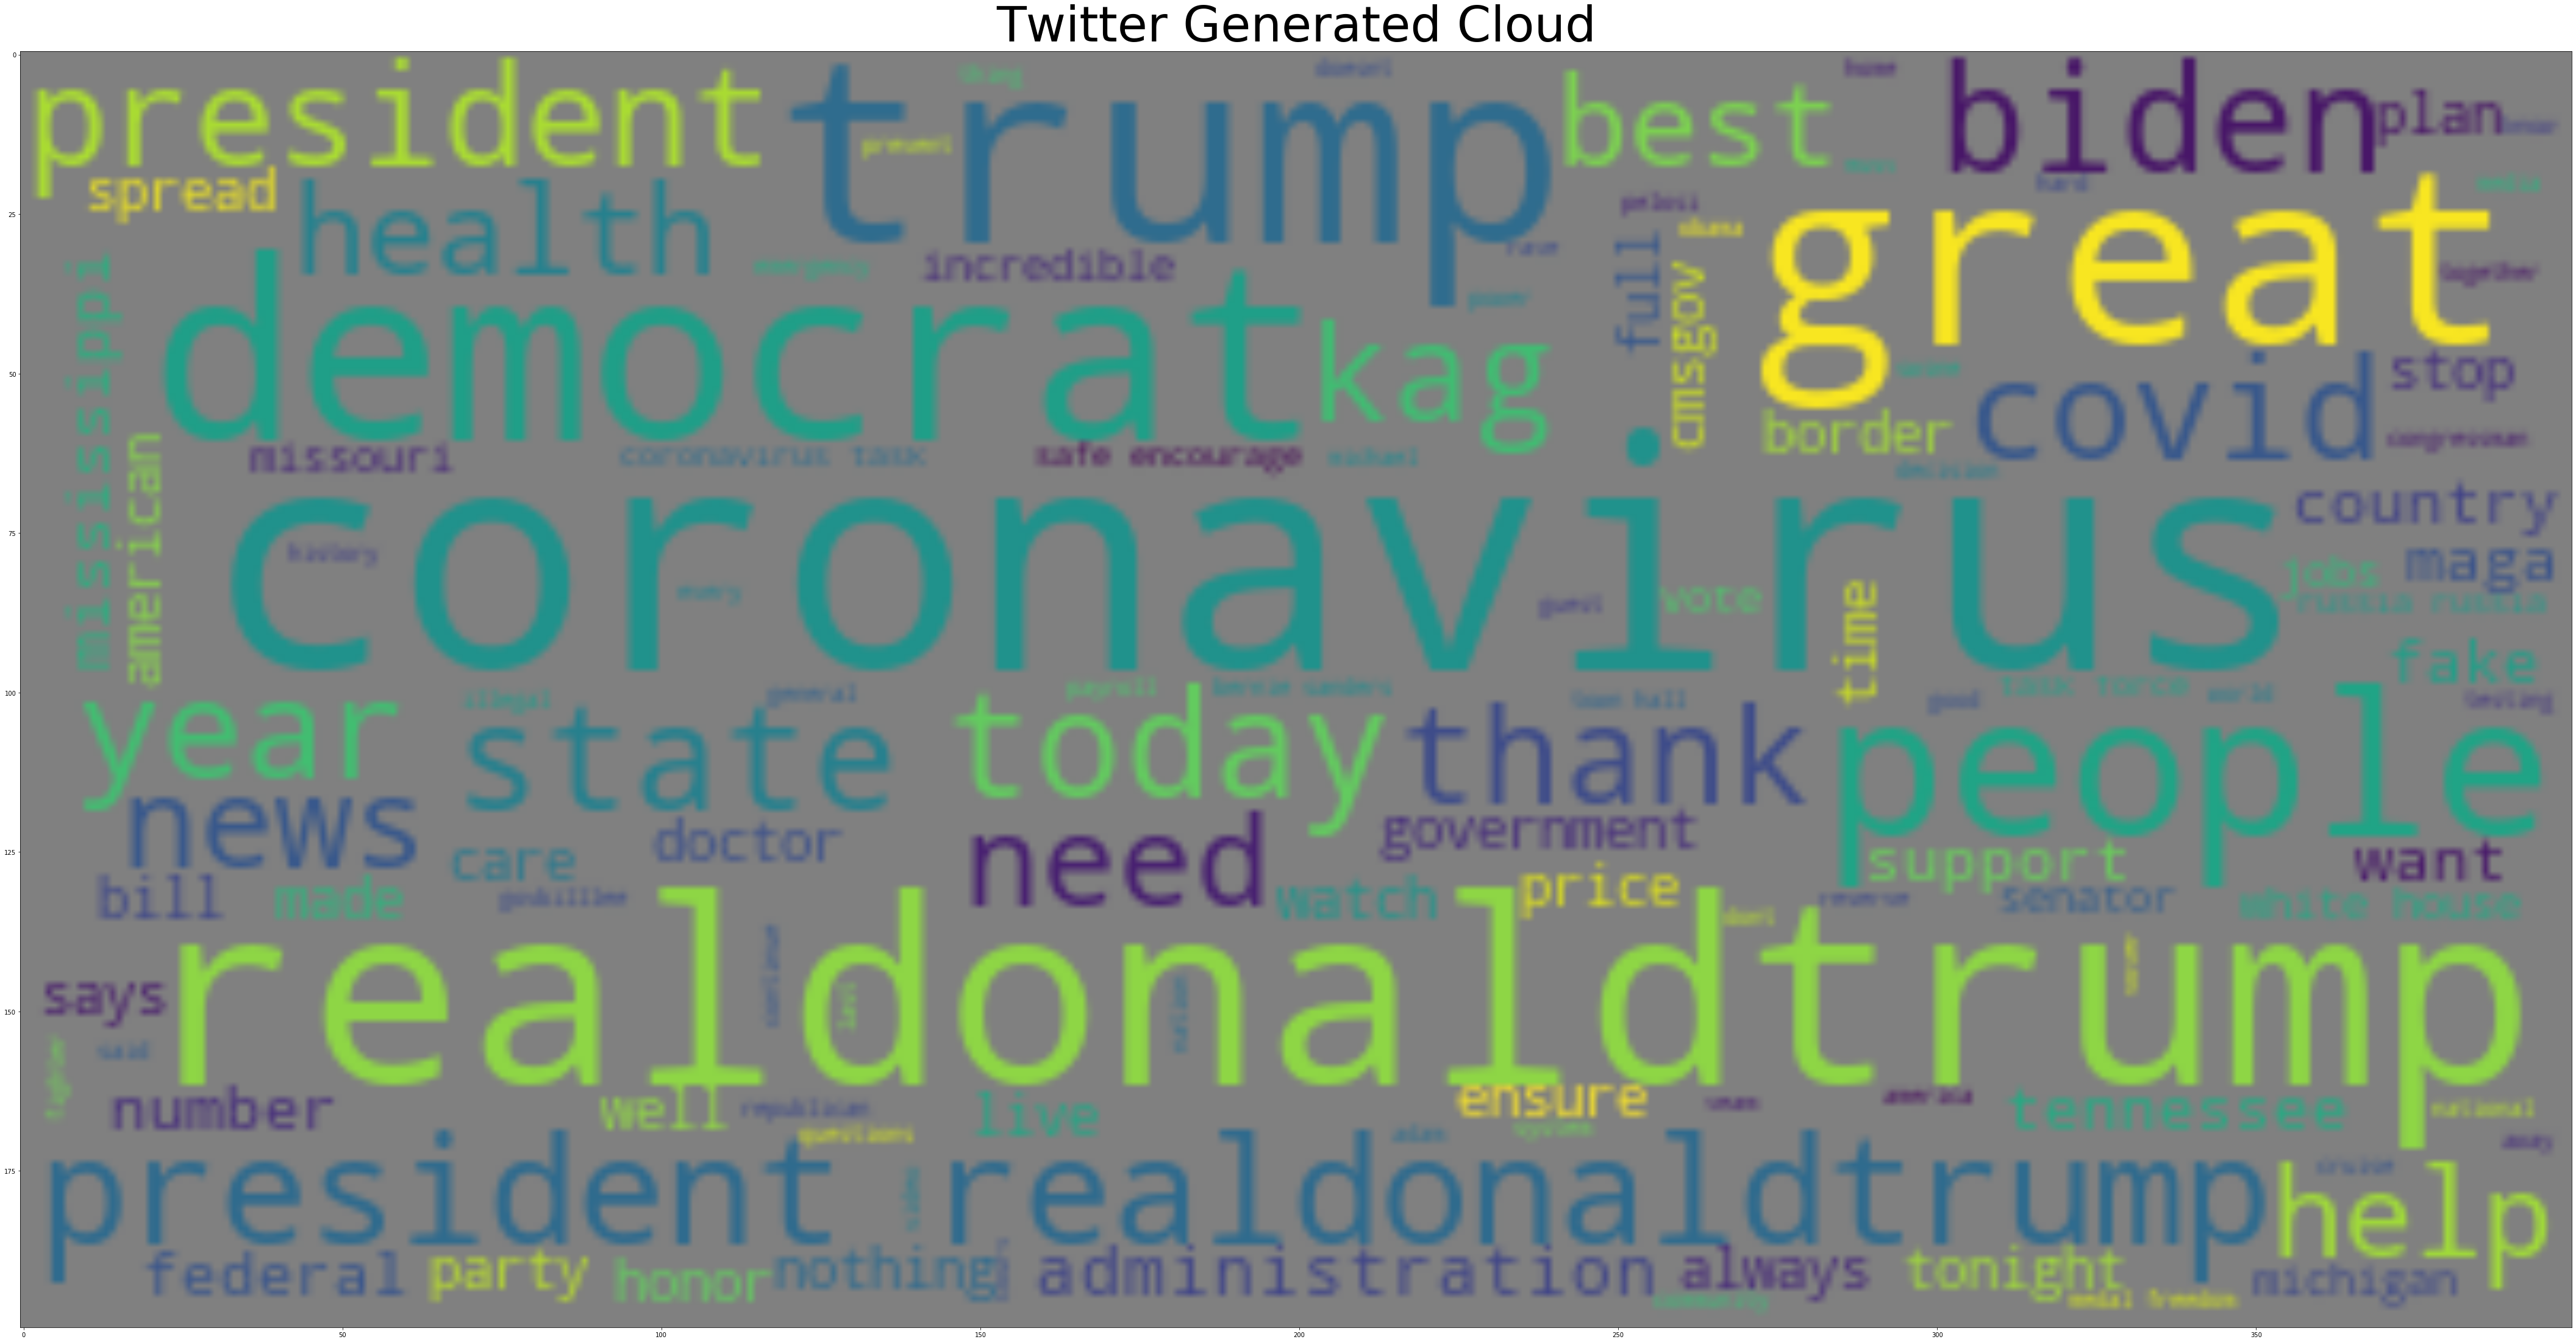

In [0]:
# Generate the Word Cloud Plot and compare against the initial text mine processes
w = plt.figure(figsize=(75,75))
plt.title('Original Stencil', size=50)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=80)
plt.show()

In [0]:
# With the viusal from the Word Cloud, proceed with a quantitative sentiment analysis. 
# Initial review indicates a negative sentiment, although "great" and "president" almost have the same weight in the 
# Word Cloud
# Remove the links and special characters in the mined text
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
# Display the results of the sub-program
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
display(data.head(11))

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,SA
0,whitehouse spirit nation unbreakable defeat threat america tested america rises,140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24,140,4.875000,9,0,0,1,0
1,whitehouse todays emergency orders allow hhsgov secretary waive applicable rules regulations give doctors hospit,140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20,140,6.050000,5,0,0,1,0
2,matter encourage turn towards prayer faith together easily prevail,124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23,124,4.434783,9,0,0,2,1
3,great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw,140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24,140,4.875000,8,0,0,0,1
4,request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap,140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18,140,6.833333,5,0,0,1,1
5,remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292,21,139,5.666667,7,0,0,0,0
6,unleash full power federal government effort today officially declaring national emer httpstcodonyaypcm3,140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836,21,140,5.714286,7,0,0,1,1
7,whitehouse live president realdonaldtrump holds news conference httpstcod975ukadhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021,10,96,8.700000,1,0,0,2,1
8,news conference today white house topic coronavirus,91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263,16,91,4.750000,5,0,0,2,0
9,point strong border policy deaths related coronavirus httpstcop3nvr62bkm,140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404,23,140,5.130435,12,0,1,1,1


In [0]:
# Using a Postive, Neutral and Negative binning process
# Create the requisite lists based in their weights and sentiment
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [0]:
# Calculate the percentage of each classification
print('Percentage of positive tweets: {}%'.format(len(pos_tweets)*100/len(data['Tweets'])))
print('Percentage of neutral tweets: {}%'.format(len(neu_tweets)*100/len(data['Tweets'])))
print('Percentage of negative tweets: {}%'.format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 44.0%
Percentage of neutral tweets: 40.0%
Percentage of negative tweets: 16.0%


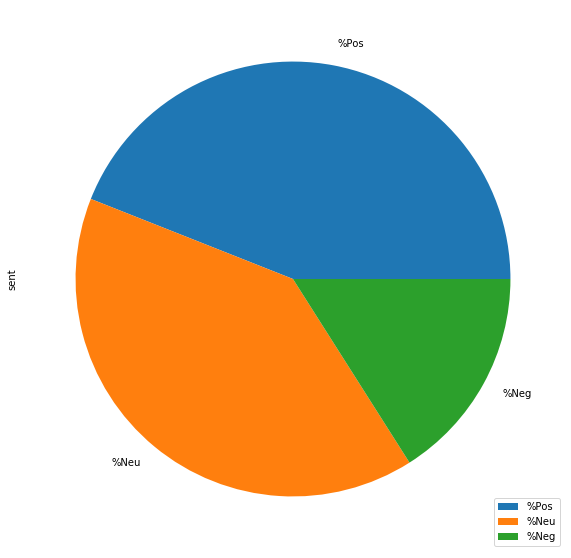

In [0]:
# Plot the percentages of the analysis in a pie chart, round up per standard statistical convention
df = pd.DataFrame({'sent': [44, 40, 16]},index=['%Pos', '%Neu', '%Neg'])
plot = df.plot.pie(y='sent', figsize=(10, 10))

In [0]:
#Tokenization
import nltk
nltk.download('punkt')
TextBlob(data['Tweets'][50]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['chadpergram', 'trump', 'says', 'provide', 'capitalliquidity', 'firms', 'impacted', 'coronavirus', 'provide', 'interest', 'loans'])

In [0]:
# Stemming of -ing, 's and -ly
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Tweets'][:11].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                              whitehous spirit nation unbreak defeat threat america test america rise
1         whitehous today emerg order allow hhsgov secretari waiv applic rule regul give doctor hospit
2                                       matter encourag turn toward prayer faith togeth easili prevail
3             great honor declar sunday march 15th nation prayer countri throughout httpstcofk5kvi6upw
4     request effect midnight tonight carniv royal caribbean norwegian agre suspend httpstcozqgbq0rvap
5                remov elimin everi obstacl necessari deliv peopl care need resourc httpstcoyndjrw3udl
6            unleash full power feder govern effort today offici declar nation emer httpstcodonyaypcm3
7                            whitehous live presid realdonaldtrump hold news confer httpstcod975ukadhj
8                                                        news confer today white hous topic coronaviru
9                                 point strong border polici death relat 

In [0]:
# Convert Words to the root word
import nltk
nltk.download('wordnet')
from textblob import Word
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Tweets'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0                                 whitehouse spirit nation unbreakable defeat threat america tested america rise
1    whitehouse today emergency order allow hhsgov secretary waive applicable rule regulation give doctor hospit
2                                             matter encourage turn towards prayer faith together easily prevail
3                    great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw
4        request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap
Name: Tweets, dtype: object

In [0]:
# N-Grams - Combo of bigrams N=2 and N=3
# Determine which words occur in combination for further analysis
TextBlob(data['Tweets'][0]).ngrams(2)

[WordList(['whitehouse', 'spirit']),
 WordList(['spirit', 'nation']),
 WordList(['nation', 'unbreakable']),
 WordList(['unbreakable', 'defeat']),
 WordList(['defeat', 'threat']),
 WordList(['threat', 'america']),
 WordList(['america', 'tested']),
 WordList(['tested', 'america']),
 WordList(['america', 'rise'])]

In [0]:
TextBlob(data['Tweets'][0]).ngrams(3)

[WordList(['whitehouse', 'spirit', 'nation']),
 WordList(['spirit', 'nation', 'unbreakable']),
 WordList(['nation', 'unbreakable', 'defeat']),
 WordList(['unbreakable', 'defeat', 'threat']),
 WordList(['defeat', 'threat', 'america']),
 WordList(['threat', 'america', 'tested']),
 WordList(['america', 'tested', 'america']),
 WordList(['tested', 'america', 'rise'])]

In [0]:
# Review the raw text and array 
a.head(11)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,SA
0,whitehouse spirit nation unbreakable defeat threat america tested america rise,140,1238600318608384001,2020-03-13 22:58:22,Twitter for iPhone,0,1266,24,140,4.875000,9,0,0,1,0
1,whitehouse today emergency order allow hhsgov secretary waive applicable rule regulation give doctor hospit,140,1238600270659170304,2020-03-13 22:58:11,Twitter for iPhone,0,1610,20,140,6.050000,5,0,0,1,0
2,matter encourage turn towards prayer faith together easily prevail,124,1238599373417787394,2020-03-13 22:54:37,Twitter for iPhone,10949,3027,23,124,4.434783,9,0,0,2,1
3,great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw,140,1238599369466753026,2020-03-13 22:54:36,Twitter for iPhone,19536,5870,24,140,4.875000,8,0,0,0,1
4,request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap,140,1238590988593086464,2020-03-13 22:21:18,Twitter for iPhone,35691,8424,18,140,6.833333,5,0,0,1,1
5,remove eliminate every obstacle necessary deliver people care need resource httpstcoyndjrw3udl,139,1238575476916006915,2020-03-13 21:19:39,Twitter for iPhone,45112,11292,21,139,5.666667,7,0,0,0,0
6,unleash full power federal government effort today officially declaring national emer httpstcodonyaypcm3,140,1238570595710836738,2020-03-13 21:00:16,Twitter for iPhone,48082,12836,21,140,5.714286,7,0,0,1,1
7,whitehouse live president realdonaldtrump hold news conference httpstcod975ukadhj,96,1238547947664609280,2020-03-13 19:30:16,Twitter for iPhone,0,10021,10,96,8.700000,1,0,0,2,1
8,news conference today white house topic coronavirus,91,1238478818135945216,2020-03-13 14:55:34,Twitter for iPhone,126169,27263,16,91,4.750000,5,0,0,2,0
9,point strong border policy death related coronavirus httpstcop3nvr62bkm,140,1238478167695863817,2020-03-13 14:52:59,Twitter for iPhone,123972,25404,23,140,5.130435,12,0,1,1,1


In [0]:
import string 
from nltk.corpus import stopwords 
stopwords = stopwords.words("english")

def _clean(txt):
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in string.punctuation)
    words = txt.split()
    words = [w for w in words if w not in stopwords]
    txt = " ".join(words)
    return txt

a["cleaned"] = a['Tweets'].apply(lambda x : _clean(x))

a[["Tweets", "cleaned"]]

,Tweets,cleaned
0,whitehouse spirit nation unbreakable defeat threat america tested america rise,whitehouse spirit nation unbreakable defeat threat america tested america rise
1,whitehouse today emergency order allow hhsgov secretary waive applicable rule regulation give doctor hospit,whitehouse today emergency order allow hhsgov secretary waive applicable rule regulation give doctor hospit
2,matter encourage turn towards prayer faith together easily prevail,matter encourage turn towards prayer faith together easily prevail
3,great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw,great honor declare sunday march 15th national prayer country throughout httpstcofk5kvi6upw
4,request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap,request effective midnight tonight carnival royal caribbean norwegian agreed suspend httpstcozqgbq0rvap
...,...,...
195,dailycaller lifelong voter talk flipped trump 2016 focused economy regulation dereg,dailycaller lifelong voter talk flipped trump 2016 focused economy regulation dereg
196,dailycaller president realdonaldtrump say ready face communist bernie sander biden super tuesday,dailycaller president realdonaldtrump say ready face communist bernie sander biden super tuesday
197,thejtlewis president realdonaldtrump excellent trumptownhall tonight getting feeling 2020,thejtlewis president realdonaldtrump excellent trumptownhall tonight getting feeling 2020
198,cbpmarkmorgan remain absolutely relentless counternarcotics mission woman remain committed keeping,cbpmarkmorgan remain absolutely relentless counternarcotics mission woman remain committed keeping


In [0]:
# Identify key Words of the Data Task 
from collections import Counter
complete_text = " ".join(data["Tweets"])
clean_text = _clean(complete_text)
Counter(clean_text.split()).most_common(10)

[('coronavirus', 31),
 ('realdonaldtrump', 28),
 ('thank', 23),
 ('president', 20),
 ('great', 19),
 ('trump', 17),
 ('democrat', 15),
 ('people', 13),
 ('state', 12),
 ('today', 11)]

In [0]:
# Identify the Top 10 Uniform Resource Locators (URL) for further investigation 
htags = [w for w in complete_text.split() if w.startswith("http")]
htags = [w for w in htags if "demon" not in w.lower()]
Counter(htags).most_common(10)

[('httpstco', 2),
 ('httpstcofk5kvi6upw', 1),
 ('httpstcozqgbq0rvap', 1),
 ('httpstcoyndjrw3udl', 1),
 ('httpstcodonyaypcm3', 1),
 ('httpstcod975ukadhj', 1),
 ('httpstcop3nvr62bkm', 1),
 ('httpstco4rvgbix3ef', 1),
 ('httpstcojxlmmeyx1q', 1),
 ('httpstcops7dkduptg', 1)]

In [0]:
# Identify the major themes in the grammar and as a result of text mining 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def create_theme_models(text):
    cvectorizer = CountVectorizer(min_df=4, max_features=3000)
    cvz = cvectorizer.fit_transform(text)

    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    theme_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
    return theme_word, vocab 

n_top_words = 10
theme_word, vocab = create_theme_models(a["cleaned"].values)
for i, theme_dist in enumerate(theme_word):
    theme_words = np.array(vocab)[np.argsort(theme_dist)][:-(n_top_words+1):-1]
    print ("Theme " + str(i+1) + ": " + " | ".join(theme_words) + "\n")

Theme 1: thank | kag2020 | task | force | coronavirus | danscavino | great | best | maga | support

Theme 2: year | state | democrat | seemacms | realdonaldtrump | cmsgov | michigan | ensure | last | party

Theme 3: news | fake | keeping | know | encourage | price | safe | trump | democrat | well

Theme 4: trump | watch | tonight | like | president | trumptownhall | realdonaldtrump | nothing | ever | best

Theme 5: russia | today | federal | plan | charliekirk11 | full | democrat | bernie | medium | government

Theme 6: people | covid19 | well | want | thank | good | cdcgov | senator | support | maga

Theme 7: administration | congressman | mississippi | coronavirus | american | time | country | great | state | spread

Theme 8: great | realdonaldtrump | thank | missouri | number | always | tennessee | best | people | president

Theme 9: coronavirus | democrat | bernie | house | white | need | help | like | payroll | realdonaldtrump

Theme 10: president | realdonaldtrump | biden | charl

In [0]:
# End of Project Python Script